In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV





In [3]:
data=pd.read_csv(r'C:\Users\work\OneDrive\Documents\crct auto-mpg.zip')
data.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','name']
data1=data.drop(['name'],axis=1)
data1=data1.replace('?',np.nan)

data1


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165,3693,11.5,70,1
1,18.0,8,318.0,150,3436,11.0,70,1
2,16.0,8,304.0,150,3433,12.0,70,1
3,17.0,8,302.0,140,3449,10.5,70,1
4,15.0,8,429.0,198,4341,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
for i in data1.columns:
    print(f'sum of total null values in {i} is',data1[i].isnull().sum())
    

    

#print(data.dtypes)

sum of total null values in MPG is 0
sum of total null values in Cylinders is 0
sum of total null values in Displacement is 0
sum of total null values in Horsepower is 6
sum of total null values in Weight is 0
sum of total null values in Acceleration is 0
sum of total null values in Model Year is 0
sum of total null values in Origin is 0


<Axes: >

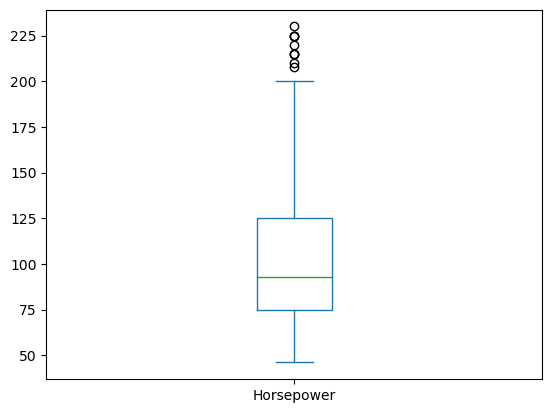

In [5]:
data1['Horsepower']=data1['Horsepower'].astype('float')
data1['Horsepower'].plot(kind='box')


In [6]:
data1.sort_values('Weight',inplace=True)
data1.interpolate('linear',inplace=True)

In [7]:
for i in data1.columns:
    print(f'sum of total null values in {i} is',data1[i].isnull().sum())
    

sum of total null values in MPG is 0
sum of total null values in Cylinders is 0
sum of total null values in Displacement is 0
sum of total null values in Horsepower is 0
sum of total null values in Weight is 0
sum of total null values in Acceleration is 0
sum of total null values in Model Year is 0
sum of total null values in Origin is 0


In [8]:
data1['Cylinders'].value_counts()

4    204
8    102
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [9]:
data1['displacement_on_power'] = data1['Displacement'] / data1['Horsepower']
data1['weight_on_cylinder'] = data1['Weight'] / data1['Cylinders']
data1['acceleration_on_power'] = data1['Acceleration'] / data1['Horsepower']
data1['acceleration_on_cyl'] = data1['Acceleration'] / data1['Cylinders']

corr_matrix=data1.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.731933
acceleration_on_power    0.708960
Model Year               0.578667
Origin                   0.562894
Acceleration             0.419133
weight_on_cylinder      -0.023361
displacement_on_power   -0.570821
Cylinders               -0.775412
Horsepower              -0.776851
Displacement            -0.803972
Weight                  -0.831558
Name: MPG, dtype: float64

In [10]:
data['Origin'].value_counts()

1    248
3     79
2     70
Name: Origin, dtype: int64

In [11]:
data1['Origin']=data1['Origin'].map({1:'China',2:'India',3:'Britain'})

In [12]:
data1

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
53,35.0,4,72.0,69.0,1613,18.0,71,Britain,1.043478,403.250,0.260870,4.5000
143,31.0,4,76.0,52.0,1649,16.5,74,Britain,1.461538,412.250,0.317308,4.1250
342,39.1,4,79.0,58.0,1755,16.9,81,Britain,1.362069,438.750,0.291379,4.2250
344,35.1,4,81.0,60.0,1760,16.1,81,Britain,1.350000,440.000,0.268333,4.0250
52,31.0,4,71.0,65.0,1773,19.0,71,Britain,1.092308,443.250,0.292308,4.7500
...,...,...,...,...,...,...,...,...,...,...,...,...
94,12.0,8,455.0,225.0,4951,11.0,73,China,2.022222,618.875,0.048889,1.3750
89,12.0,8,429.0,198.0,4952,11.5,73,China,2.166667,619.000,0.058081,1.4375
41,12.0,8,383.0,180.0,4955,11.5,71,China,2.127778,619.375,0.063889,1.4375
102,11.0,8,400.0,150.0,4997,14.0,73,China,2.666667,624.625,0.093333,1.7500


In [13]:
data1=pd.get_dummies(data1,columns=['Origin'])


In [14]:
data1.isna().sum()

MPG                      0
Cylinders                0
Displacement             0
Horsepower               0
Weight                   0
Acceleration             0
Model Year               0
displacement_on_power    0
weight_on_cylinder       0
acceleration_on_power    0
acceleration_on_cyl      0
Origin_Britain           0
Origin_China             0
Origin_India             0
dtype: int64

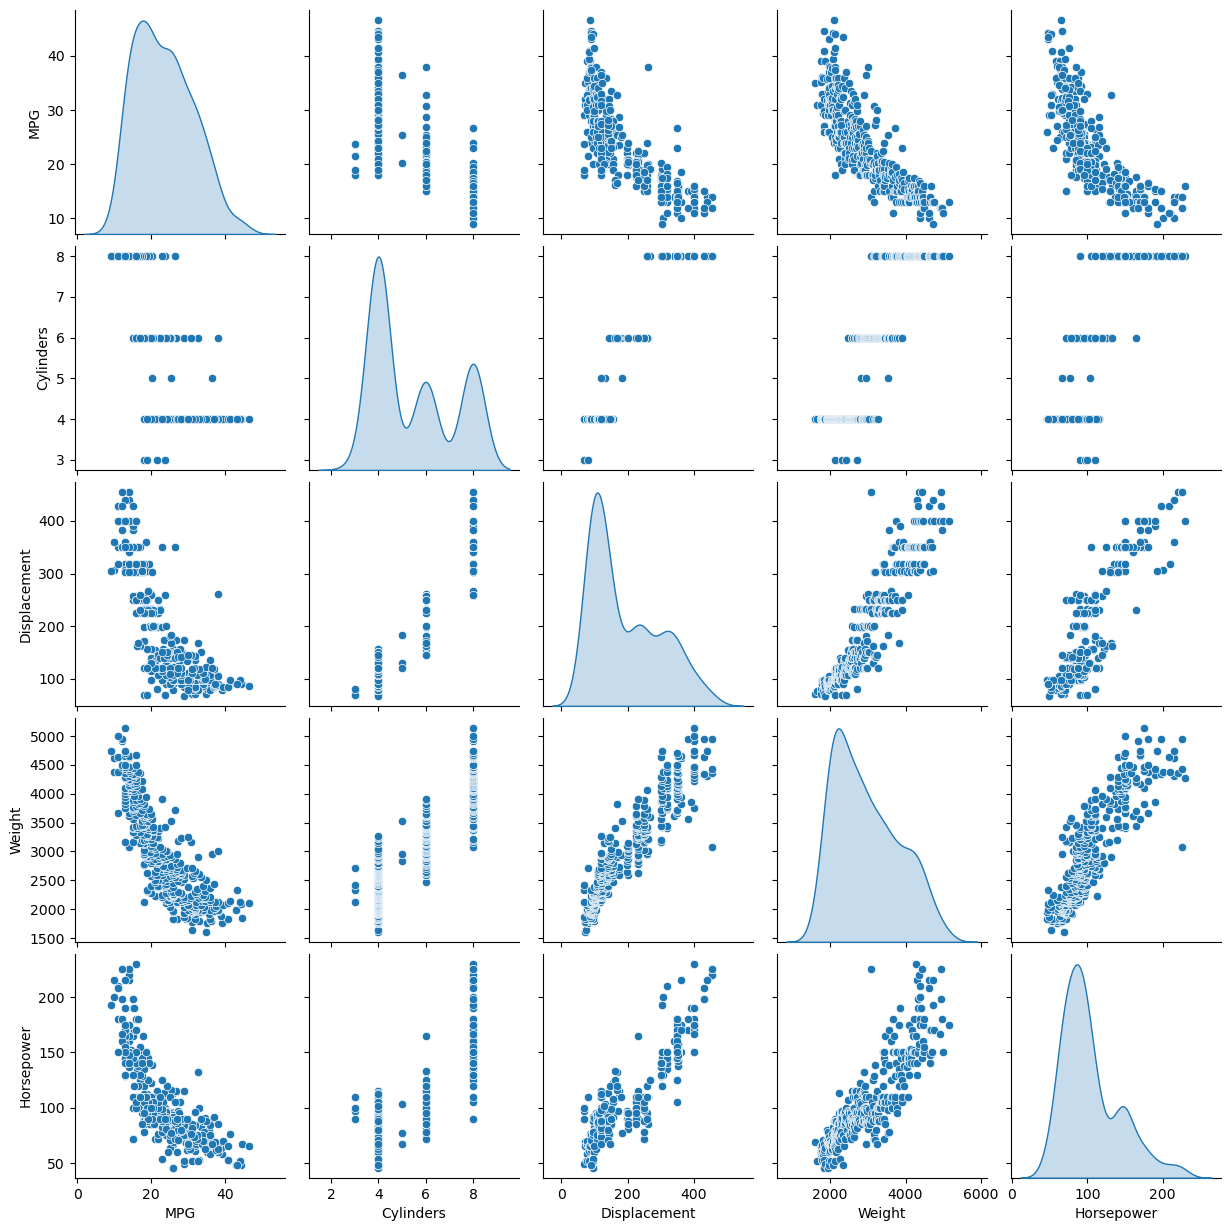

In [15]:
sns.pairplot(data1[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data1.drop('Cylinders',axis=1),data1['Cylinders'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=data1['Cylinders'])

In [17]:
data1

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl,Origin_Britain,Origin_China,Origin_India
53,35.0,4,72.0,69.0,1613,18.0,71,1.043478,403.250,0.260870,4.5000,1,0,0
143,31.0,4,76.0,52.0,1649,16.5,74,1.461538,412.250,0.317308,4.1250,1,0,0
342,39.1,4,79.0,58.0,1755,16.9,81,1.362069,438.750,0.291379,4.2250,1,0,0
344,35.1,4,81.0,60.0,1760,16.1,81,1.350000,440.000,0.268333,4.0250,1,0,0
52,31.0,4,71.0,65.0,1773,19.0,71,1.092308,443.250,0.292308,4.7500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,12.0,8,455.0,225.0,4951,11.0,73,2.022222,618.875,0.048889,1.3750,0,1,0
89,12.0,8,429.0,198.0,4952,11.5,73,2.166667,619.000,0.058081,1.4375,0,1,0
41,12.0,8,383.0,180.0,4955,11.5,71,2.127778,619.375,0.063889,1.4375,0,1,0
102,11.0,8,400.0,150.0,4997,14.0,73,2.666667,624.625,0.093333,1.7500,0,1,0


In [18]:
x_train=pd.concat([x_train,y_train])
x_test=pd.concat([x_test,y_test])

In [19]:
x_train

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl,Origin_Britain,Origin_China,Origin_India,0
325,43.4,90.0,48.0,2335.0,23.7,80.0,1.875000,583.750000,0.493750,5.925,0.0,0.0,1.0,NaN
241,21.5,121.0,110.0,2600.0,12.8,77.0,1.100000,650.000000,0.116364,3.200,0.0,0.0,1.0,NaN
242,21.5,80.0,110.0,2720.0,13.5,77.0,0.727273,906.666667,0.122727,4.500,1.0,0.0,0.0,NaN
380,36.0,107.0,75.0,2205.0,14.5,82.0,1.426667,551.250000,0.193333,3.625,1.0,0.0,0.0,NaN
40,14.0,318.0,150.0,4096.0,13.0,71.0,2.120000,512.000000,0.086667,1.625,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


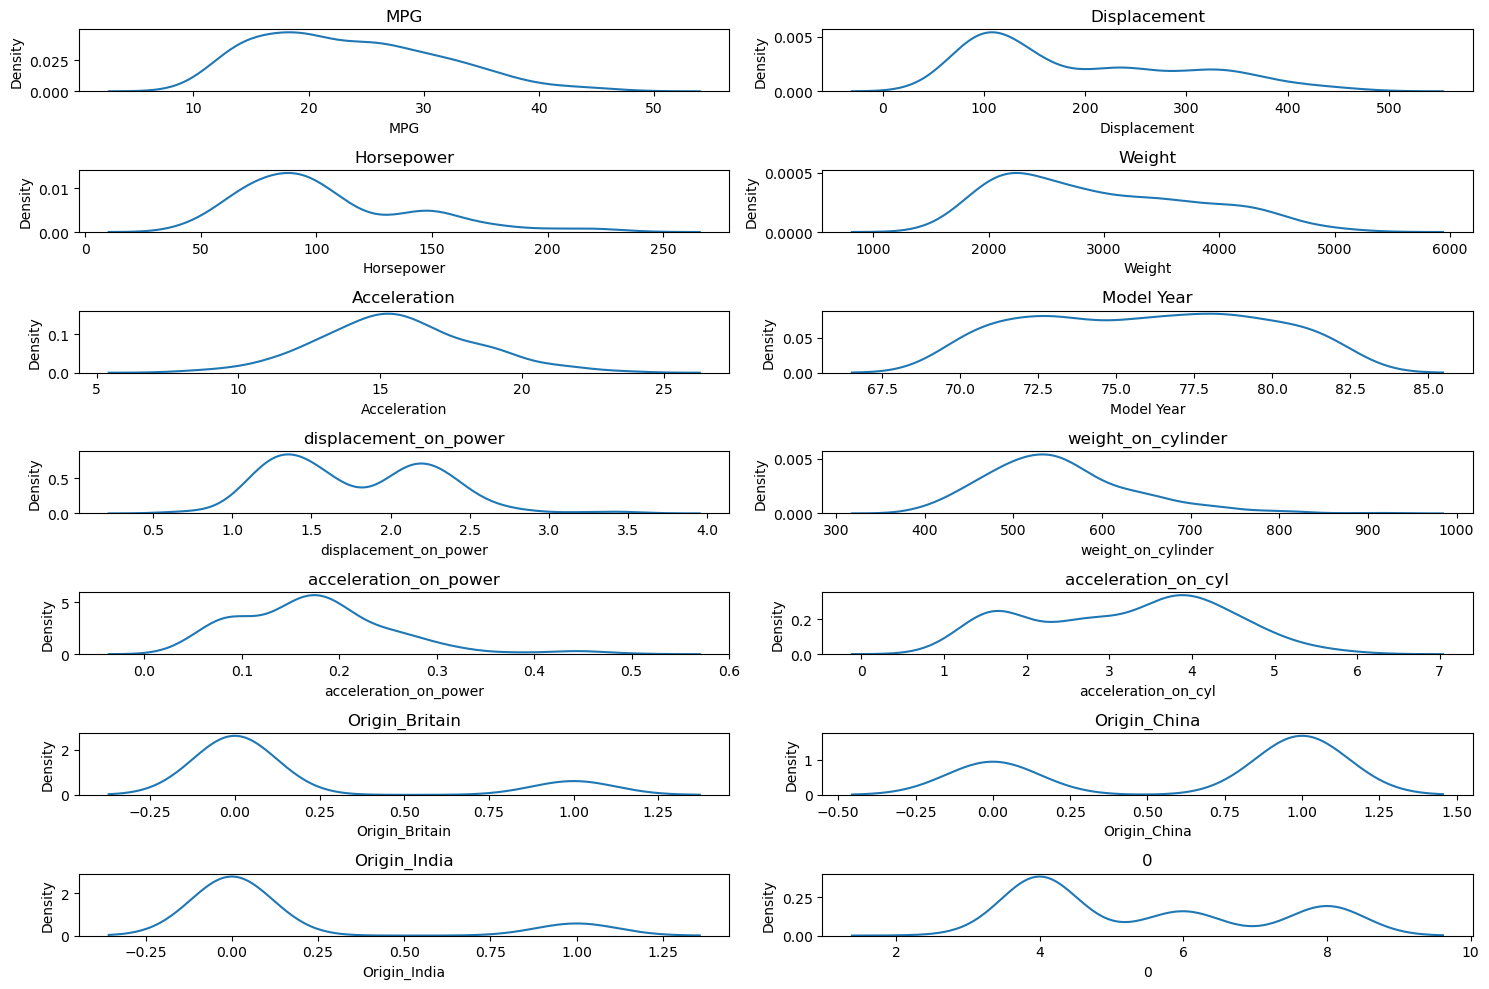

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 10))  # Adjust dimensions as needed
for i, col in enumerate(x_train.columns):
    row, coln = i // 2, i % 2
    sns.kdeplot(x_train[col], ax=axes[row, coln])
    axes[row, coln].set_title(col)
plt.tight_layout()
plt.show()


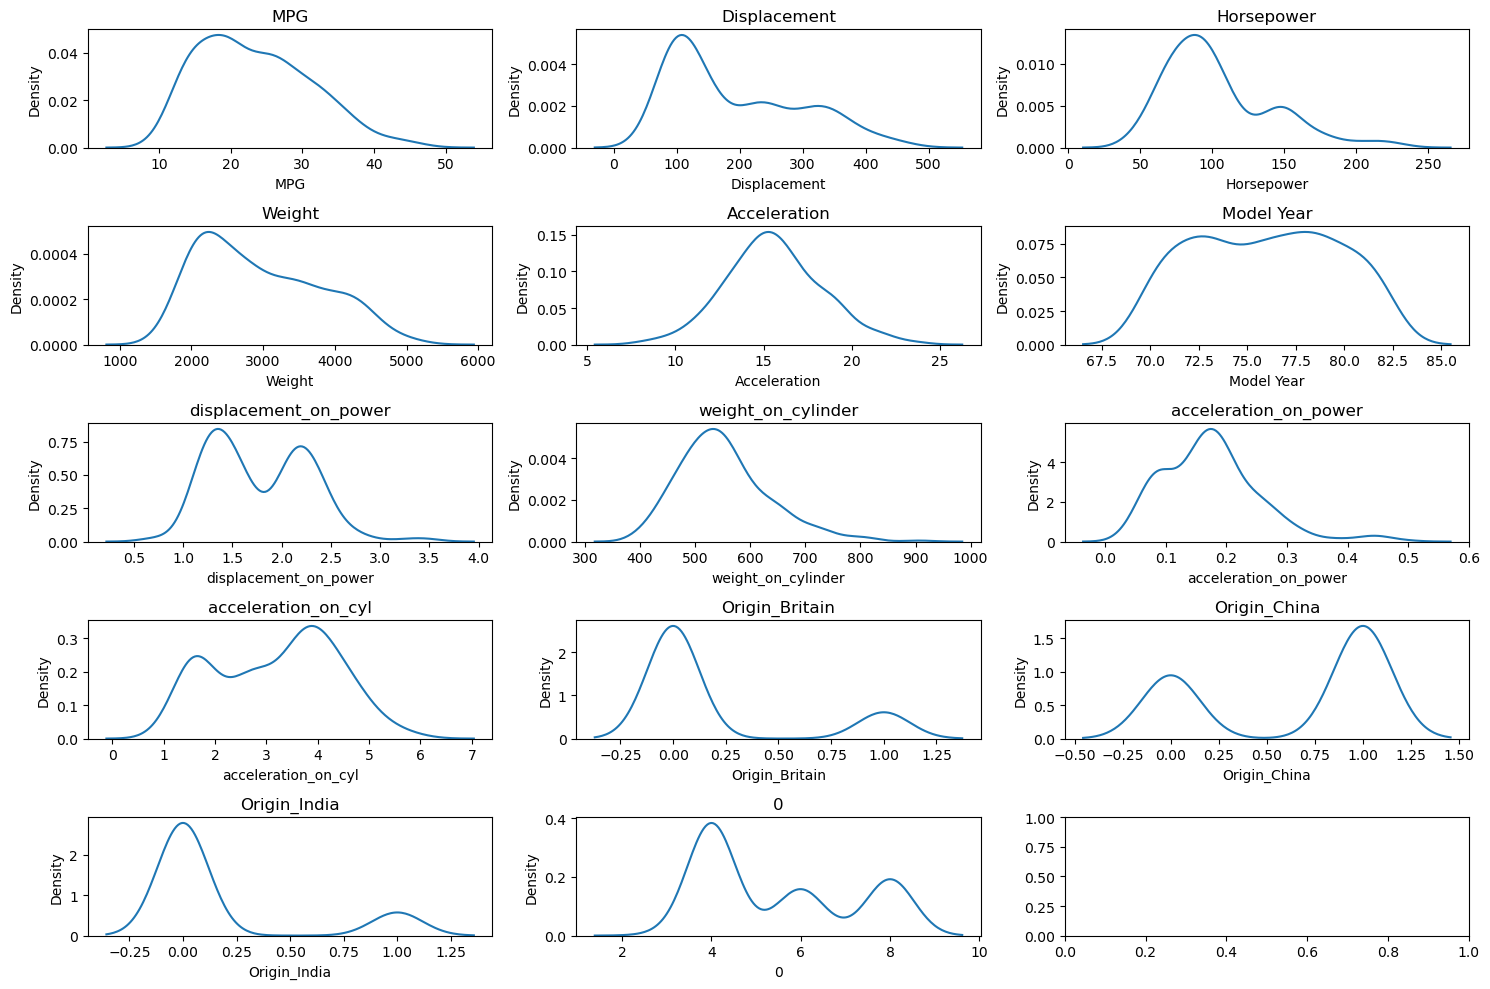

In [21]:


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10)) ## Adjust dimensions as needed
for i, col in enumerate(x_train):
    
    row, coln = i // 3, i % 3
    sns.kdeplot(x_train[col], ax=axes[row, coln])
    axes[row, coln].set_title(col)
plt.tight_layout()
plt.show()

In [22]:
def preprocessor(x):
    A=np.copy(x)
    A[:,:9]=StandardScaler().fit_transform(A[:,:9])
    return A

In [23]:
pipeline_transformer= FunctionTransformer(preprocessor)


In [24]:
a,b,c,d = x_train.drop(['MPG'],axis=1),x_train['MPG'],x_test.drop(['MPG'],axis=1), x_test['MPG'] 
b=pd.DataFrame({"MPG":x_train['MPG']})
d=pd.DataFrame({'MPG':x_test["MPG"]})

In [76]:
print(c.columns)

Index([         'Displacement',            'Horsepower',
                      'Weight',          'Acceleration',
                  'Model Year', 'displacement_on_power',
          'weight_on_cylinder', 'acceleration_on_power',
         'acceleration_on_cyl',        'Origin_Britain',
                'Origin_China',          'Origin_India',
                             0],
      dtype='object')


In [80]:
a=a.drop(0,axis=1)
c=c.drop(0,axis=1)

In [81]:
z=[a,b,c,d]
for i in z:
    for j in i.columns:
        i[j]=i[j].dropna()
        
        
        

In [82]:
def fit_and_print(pipeline,x_trains=a,y_train=b,x_tests=c,y_test=d):
    
    x_trains.columns=x_trains.columns.astype(str)
    y_train.columns=y_train.columns.astype(str)
    x_tests.columns=x_tests.columns.astype(str)
    y_test.columns=y_test.columns.astype(str)
    pipeline.fit(x_trains,y_train)
    train_predict=pipeline.predict(x_trains)
    test_predict=pipeline.predict(x_tests)
    print('training error is ',mean_squared_error(train_predict,y_train))
    print('testing error is',mean_squared_error(test_predict,y_test))
    cross_val=cross_val_score(pipeline, pd.concat([x_trains,x_tests],axis=0,ignore_index=True),pd.concat([y_train,y_test],axis=0,ignore_index=True) , cv=5,scoring='neg_mean_squared_error')
    sqrt_err=np.sqrt(-cross_val)
    

    print('error after cross validation is',cross_val)
    print('sqrt error after cross validation is',sqrt_err)
    
    

    
    
    
    
          

In [94]:
    p1=Pipeline([('scaling',pipeline_transformer),('svm',svm.SVR())])
    paramgrid = {
    'svm__C': [0.1, 1, 10],
    'svm__epsilon': [0.1, 0.01, 0.001]
    }
    grid_search=GridSearchCV(p1,paramgrid,cv=5,error_score='raise')
    grid_search.fit(pd.concat([a,c],axis=0,ignore_index=True) ,pd.concat([b,d],axis=0,ignore_index=True))
 
    best_params=grid_search.best_params_
    best_model=grid_search.best_estimator_
    best_p1=grid_search.best_estimator_
    fit_and_print(best_p1)
    



C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

training error is  3.724556705711272
testing error is 8.282170974059747
error after cross validation is [-4.18212475 -4.52788868 -4.26301392 -4.44502156 -8.46905781]
sqrt error after cross validation is [2.04502439 2.12788362 2.06470674 2.10832198 2.91016457]


C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'SVR' object has no attribute 'feature_importances_'

,Displacement,Horsepower,Weight,Acceleration,Model Year,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl,Origin_Britain,Origin_China,Origin_India,0
175,232.0,90.0,3211.0,17.0,75.0,2.577778,535.166667,0.188889,2.833333,0.0,1.0,0.0,6.0
188,304.0,120.0,3962.0,13.9,76.0,2.533333,495.250000,0.115833,1.737500,0.0,1.0,0.0,8.0
27,304.0,193.0,4732.0,18.5,70.0,1.575130,591.500000,0.095855,2.312500,0.0,1.0,0.0,8.0
78,96.0,69.0,2189.0,18.0,72.0,1.391304,547.250000,0.260870,4.500000,0.0,0.0,1.0,4.0
259,225.0,110.0,3620.0,18.7,78.0,2.045455,603.333333,0.170000,3.116667,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,105.0,70.0,2150.0,14.9,79.0,1.500000,537.500000,0.212857,3.725000,0.0,1.0,0.0,4.0
352,105.0,74.0,2190.0,14.2,81.0,1.418919,547.500000,0.191892,3.550000,0.0,0.0,1.0,4.0
60,122.0,86.0,2226.0,16.5,72.0,1.418605,556.500000,0.191860,4.125000,0.0,1.0,0.0,4.0
371,151.0,90.0,2735.0,18.0,82.0,1.677778,683.750000,0.200000,4.500000,0.0,1.0,0.0,4.0


In [95]:
p2=Pipeline([('Scalar',pipeline_transformer),('Dt',DecisionTreeRegressor())])
paramgrid = {
    'Dt__max_depth': [3, 5, 7],
    'Dt__min_samples_split': [2, 5, 10],
    'Dt__min_samples_leaf': [1, 2, 4],
    'Dt__criterion': ['mse', 'friedman_mse'],
    'Dt__max_features': ['auto', 'sqrt']
}
grid_search1=GridSearchCV(p2,paramgrid,cv=5)
grid_search1.fit(pd.concat([a,c],axis=0,ignore_index=True) ,pd.concat([b,d],axis=0,ignore_index=True))

best_params1=grid_search1.best_params_
best_model1=grid_search1.best_estimator_


best_p2=grid_search1.best_estimator_

model = best_p2.steps[-1][1]
importances=model.feature_importances

fit_and_print(best_p2)


best_estimator = grid_search1.best_estimator_
model = best_estimator.steps[-1][1]  # Assuming the model is the last step in the pipeline
importances = model.feature_importances_


C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anacon

C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anacon

C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\work\anacon

C:\Users\work\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\work\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\work\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\work\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\work\anaconda3\Lib\site-packag

AttributeError: 'DecisionTreeRegressor' object has no attribute 'feature_importances'

In [88]:
p3=Pipeline([('Scalar',pipeline_transformer),('lgr',LinearRegression())])
fit_and_print(p3)

training error is  7.882334193280764
testing error is 10.58355401588382
error after cross validation is [ -7.74939318  -8.67815287  -7.89140274  -8.49042928 -10.97815072]
sqrt error after cross validation is [2.78377319 2.94587048 2.80916406 2.91383412 3.31332925]


In [142]:
fit_and_print(p1)

C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training error is  8.362796594556734
testing error is 12.86017100257568


C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

error after cross validation is [ -8.65164731  -8.91318651  -7.5786674   -7.68203852 -13.16093389]
sqrt error after cross validation is [2.94136827 2.98549602 2.75293796 2.77164906 3.62780014]


C:\Users\work\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
